#### Imports

In [319]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

from helper.normalizer import normalize
from config import FEATURES_USED_BY_CLASSIFIER

#### Einlesen der Daten und Aufteilen in Training- und Testdaten

In [320]:
df = pd.read_csv('output_isDigit.csv')
df = df[df['stopwords_removed'] == True]
df = df[df['author'] != 'ALL']
df = df[df['fixed_token_count'] == df['fixed_token_count'].max()]

features = FEATURES_USED_BY_CLASSIFIER

df = normalize(df, features)

df_train = df[df['language'] == 'en'] # Trainingsdaten
df_test = df[df['language'] == 'de'] # Testdaten


X_train = df_train[features]
y_train = df_train['author']

X_test = df_test[features]
y_test = df_test['author']

#### Trainieren des Klassifikators und Speichern der Genauigkeitswerte

In [321]:
from sklearn.neighbors import KNeighborsClassifier

decision_tree = DecisionTreeClassifier()
nn_classificator = KNeighborsClassifier(n_neighbors=5)


classifier = decision_tree

accuracy_score_list = []

# Um Zufallseffekte zu umgehen, bilden wir den Durchschnitt der Genauigkeit in 100 unterschiedlichen Läufen
for _ in range(100):

    classifier.fit(X_train, y_train)

    y_prediction = classifier.predict(X_test)

    accuracy_score_list.append(accuracy_score(y_test, y_prediction))

print(np.mean(accuracy_score_list))



0.5294117647058824


In [322]:
classifier.fit(X_train, y_train)

y_prediction = classifier.predict(X_test)
df_test['author_predicted'] = y_prediction
print(df_test[['author', 'author_predicted']])

        author author_predicted
126     Austen        Nietzsche
127     Austen        Nietzsche
128      Hesse        Nietzsche
130      Hesse            Hesse
131  Nietzsche        Nietzsche
133  Nietzsche        Nietzsche
139  Nietzsche        Nietzsche
140     Austen        Nietzsche
142      Kafka        Nietzsche
143     Austen        Nietzsche
148      Hesse        Nietzsche
150      Hesse            Hesse
151      Kafka        Nietzsche
152  Nietzsche        Nietzsche
153  Nietzsche        Nietzsche
155      Kafka            Kafka
157      Kafka            Kafka


/var/folders/1b/4rzm4lxn2rl2qs92rlgd_4m80000gp/T/ipykernel_5111/3866783458.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['author_predicted'] = y_predicted


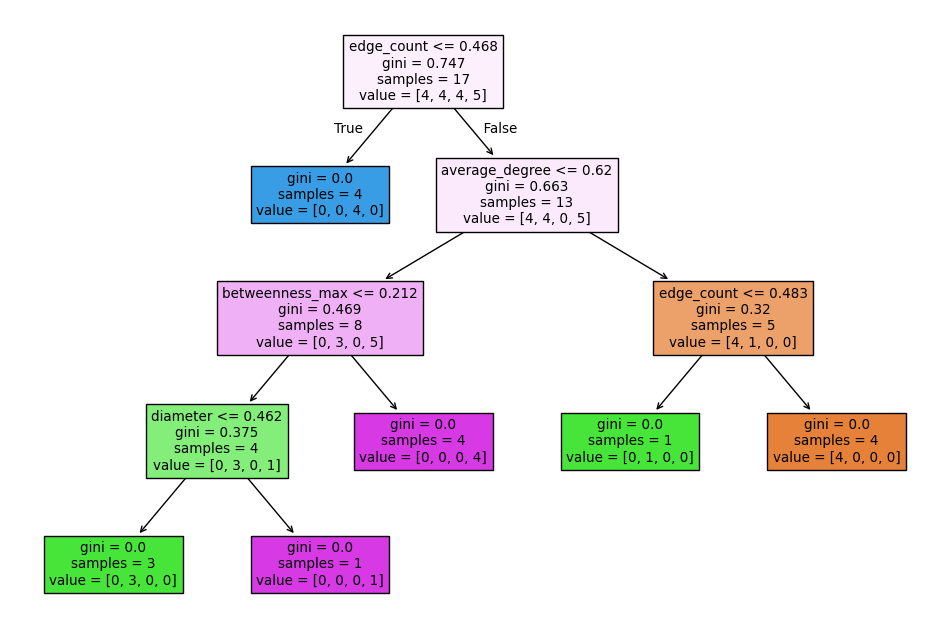

edge_count: 0.448
average_degree: 0.257
betweenness_max: 0.177
diameter: 0.118
node_count: 0.000
median_degree: 0.000
average_distance: 0.000
betweenness_average: 0.000
betweenness_min: 0.000
betweenness_standard_deviation: 0.000
average_clustering: 0.000
powerlaw_alpha_value: 0.000
powerlaw_xmin_value: 0.000


In [323]:
# Darstellung von ChatGPT
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(classifier, feature_names=features, filled=True)
plt.show()

for name, imp in sorted(zip(features, classifier.feature_importances_), key=lambda x: x[1], reverse=True):
    print(f'{name}: {imp:.3f}')